In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.model_selection import train_test_split
from DataPreparation import DataPreparation

In [3]:
pics = './images'

In [4]:
df = pd.read_csv('./data/balanced_dataframe.csv', index_col=None)
df.head()

,MaxAbsEStateIndex,MinAbsEStateIndex,qed,SPS,MaxPartialCharge,MinPartialCharge,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,...,fr_Nhpyrrole,fr_aldehyde,fr_amidine,fr_aryl_methyl,fr_benzene,fr_benzodiazepine,fr_diazo,fr_halogen,fr_hdrzine,label
0,10.337455,-1.272753,23.375000,505.329,79.918731,10.123678,9.103951,-0.051090,3.459112,1.375036,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,10.335047,-1.271941,23.375000,505.329,79.918731,10.124302,9.103026,-0.051090,3.450909,1.367373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,10.333078,-1.271281,23.375000,505.329,79.918731,10.124439,9.103025,-0.051090,3.448581,1.360843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,10.355554,-1.235039,25.218750,440.504,16.562573,9.897992,5.825210,-0.051059,3.346646,1.323034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,6.090409,0.226017,12.285714,362.614,79.918731,10.103988,9.101988,0.552888,3.020157,1.976391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [5]:
X = df.drop(columns=['label'])
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify=y
                                                    )
y_test.value_counts()

In [ ]:
data_preparation = DataPreparation(X_train, X_test, y_train, y_test)

# # get scaled clean data
# # use StandartScaler
X_train, X_test, y_train, y_test = data_preparation.clean_dataset()

### Decision Tree

In [ ]:
values = [i for i in range(1, 21)]
dtc_train_scores = []
dtc_test_scores = []
for i in values:
    dtc = DecisionTreeClassifier(max_depth=i)

    dtc.fit(X_train, y_train)

    train_yhat = dtc.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    dtc_train_scores.append(train_acc)
    
    test_yhat = dtc.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    dtc_test_scores.append(test_acc)

    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

## Plot

In [ ]:
plt.figure(1, figsize=(8,8))
plt.plot(values, dtc_train_scores, '-o', label='Train')
plt.plot(values, dtc_test_scores, '-o', label='Test')
plt.legend()
plt.xticks(range(1, 21))
plt.grid()
plt.title('DecisionTreeClassifier')
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.show()
# plt.savefig(f'{pics}/dtree_balanced.png')

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

values = [i for i in range(1, 21)]
rf_train_scores = []
rf_test_scores = []
for i in values:
    rf = RandomForestClassifier(max_depth=i)

    rf.fit(X_train, y_train)

    train_yhat = rf.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    rf_train_scores.append(train_acc)
    
    test_yhat = rf.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    rf_test_scores.append(test_acc)

    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

In [ ]:
plt.figure(1, figsize=(8,8))
plt.plot(values, rf_train_scores, '-o', label='Train')
plt.plot(values, rf_test_scores, '-o', label='Test')
plt.legend()
plt.xticks(range(1, 21))
plt.grid()
plt.title('RandomForestClassifier')
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.show()
# plt.savefig(f'{pics}/rf_balanced.png')

## After feature selection N = 20

In [6]:
clmns_sel = ['PEOE_VSA13',
    'Chi3v',
    'FpDensityMorgan3',
    'Kappa1',
    'BertzCT',
    'EState_VSA3',
    'SMR_VSA4',
    'BCUT2D_LOGPLOW',
    'Chi2n',
    'qed',
    'EState_VSA11',
    'BCUT2D_MWHI',
    'MinPartialCharge',
    'MinAbsEStateIndex',
    'SMR_VSA2',
    'SlogP_VSA3',
    'Kappa3',
    'MaxPartialCharge',
    'SlogP_VSA1',
    'PEOE_VSA3' ]
R = X[clmns_sel]
R

,PEOE_VSA13,Chi3v,FpDensityMorgan3,Kappa1,BertzCT,EState_VSA3,SMR_VSA4,BCUT2D_LOGPLOW,Chi2n,qed,EState_VSA11,BCUT2D_MWHI,MinPartialCharge,MinAbsEStateIndex,SMR_VSA2,SlogP_VSA3,Kappa3,MaxPartialCharge,SlogP_VSA1,PEOE_VSA3
0,15.929944,24.793308,9.103951,30.960622,0.000000,4.0,20.939096,3.068350e+07,17.696186,23.375000,1.0,-0.051090,10.123678,-1.272753,17.475505,0.116048,40.759436,79.918731,13.782540,0.000000
1,15.929944,24.793308,9.103026,30.960622,0.000000,4.0,20.939096,3.001086e+07,23.762553,23.375000,1.0,-0.051090,10.124302,-1.271941,11.828328,0.117146,40.759436,79.918731,13.772163,0.000000
2,15.929944,24.793308,9.103025,30.960622,0.000000,4.0,20.939096,2.989174e+07,17.696186,23.375000,1.0,-0.051090,10.124439,-1.271281,11.828328,0.117998,40.759436,79.918731,13.773383,0.000000
3,0.000000,20.056445,5.825210,56.643908,0.000000,3.0,12.841643,3.243335e+07,48.794463,25.218750,1.0,-0.051059,9.897992,-1.235039,5.817863,0.553914,41.216776,16.562573,7.108612,0.000000
4,27.530884,4.417151,9.101988,6.420822,0.000000,3.0,28.935581,1.167653e+05,45.758864,12.285714,1.0,0.552888,10.103988,0.226017,5.948339,0.898357,51.150887,79.918731,6.271772,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095,11.336786,0.000000,7.218019,27.315968,5.559267,3.0,15.780072,1.688028e+05,30.537829,11.304348,1.0,0.492694,10.208623,-0.411430,11.477173,0.579532,50.667004,32.133549,2.264240,12.841643
6096,0.000000,18.221247,7.926766,19.889315,0.000000,0.0,5.697039,2.721476e+05,13.847474,29.375000,0.0,-0.845814,10.227966,-3.541177,5.907180,-0.018440,22.375235,32.233449,27.154937,0.000000
6097,11.600940,19.428958,6.324554,45.572602,5.907180,2.0,57.680175,1.193943e+08,38.821852,22.542857,0.0,-0.667596,9.704724,-0.204735,29.189097,1.136124,40.369838,35.495692,5.237276,25.180371
6098,11.761885,14.325937,8.000113,17.330112,0.000000,2.0,24.725238,4.473418e+06,19.056471,18.250000,1.0,-0.126220,10.296962,-0.464767,11.938294,0.505647,30.331835,32.166684,7.406409,0.000000


In [7]:
X_train, X_test, y_train, y_test = train_test_split(R, y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify=y
                                                    )

0    915
1    915
Name: label, dtype: int64

In [8]:
data_preparation = DataPreparation(X_train, X_test, y_train, y_test)
X_train, X_test, y_train, y_test = data_preparation.clean_dataset()

Index(['PEOE_VSA13', 'Chi3v', 'FpDensityMorgan3', 'Kappa1', 'BertzCT',
       'EState_VSA3', 'SMR_VSA4', 'BCUT2D_LOGPLOW', 'Chi2n', 'qed',
       'EState_VSA11', 'BCUT2D_MWHI', 'MinPartialCharge', 'MinAbsEStateIndex',
       'SMR_VSA2', 'SlogP_VSA3', 'PEOE_VSA3'],
      dtype='object')


### Decision Tree

In [9]:
values = [i for i in range(1, 21)]
dtc_train_scores = []
dtc_test_scores = []
for i in values:
    dtc = DecisionTreeClassifier(max_depth=i)

    dtc.fit(X_train, y_train)

    train_yhat = dtc.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    dtc_train_scores.append(train_acc)
    
    test_yhat = dtc.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    dtc_test_scores.append(test_acc)

    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.783, test: 0.781
>2, train: 0.833, test: 0.837
>3, train: 0.861, test: 0.858
>4, train: 0.887, test: 0.872
>5, train: 0.910, test: 0.882
>6, train: 0.932, test: 0.891
>7, train: 0.943, test: 0.893
>8, train: 0.957, test: 0.904
>9, train: 0.963, test: 0.903
>10, train: 0.973, test: 0.911
>11, train: 0.978, test: 0.908
>12, train: 0.984, test: 0.909
>13, train: 0.988, test: 0.901
>14, train: 0.991, test: 0.902
>15, train: 0.994, test: 0.902
>16, train: 0.995, test: 0.904
>17, train: 0.996, test: 0.908
>18, train: 0.997, test: 0.905
>19, train: 0.998, test: 0.903
>20, train: 1.000, test: 0.903


## Plot

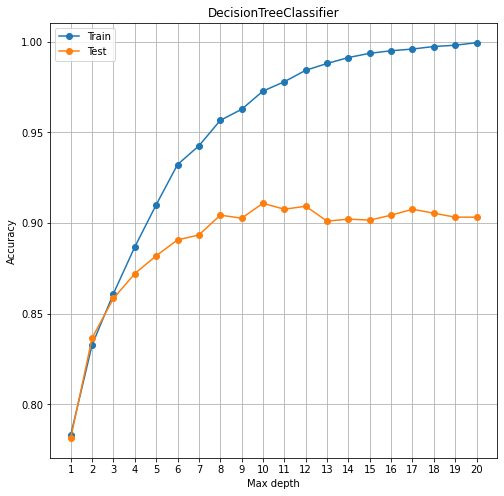

In [10]:
plt.figure(1, figsize=(8,8))
plt.plot(values, dtc_train_scores, '-o', label='Train')
plt.plot(values, dtc_test_scores, '-o', label='Test')
plt.legend()
plt.xticks(range(1, 21))
plt.grid()
plt.title('DecisionTreeClassifier')
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.show()
plt.savefig(f'{pics}/dtree_balanced_sel.png')

### Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

values = [i for i in range(1, 21)]
rf_train_scores = []
rf_test_scores = []
for i in values:
    rf = RandomForestClassifier(max_depth=i)

    rf.fit(X_train, y_train)

    train_yhat = rf.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    rf_train_scores.append(train_acc)
    
    test_yhat = rf.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    rf_test_scores.append(test_acc)

    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.829, test: 0.829
>2, train: 0.867, test: 0.869
>3, train: 0.887, test: 0.888
>4, train: 0.905, test: 0.902
>5, train: 0.926, test: 0.908
>6, train: 0.944, test: 0.917
>7, train: 0.955, test: 0.930
>8, train: 0.967, test: 0.936
>9, train: 0.974, test: 0.937
>10, train: 0.983, test: 0.943
>11, train: 0.988, test: 0.944
>12, train: 0.992, test: 0.948
>13, train: 0.995, test: 0.946
>14, train: 0.997, test: 0.950
>15, train: 0.998, test: 0.951
>16, train: 0.999, test: 0.951
>17, train: 1.000, test: 0.951
>18, train: 1.000, test: 0.950
>19, train: 1.000, test: 0.951
>20, train: 1.000, test: 0.952


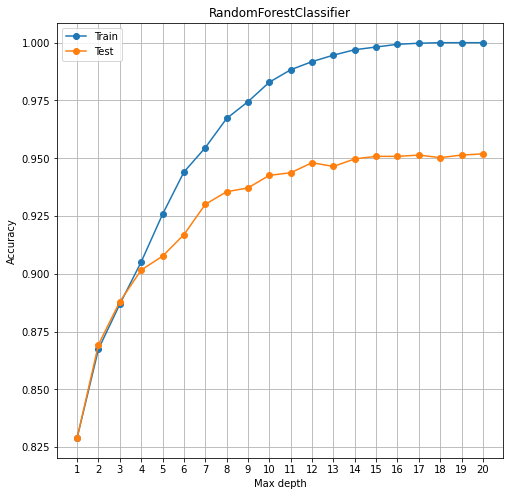

In [12]:
plt.figure(1, figsize=(8,8))
plt.plot(values, rf_train_scores, '-o', label='Train')
plt.plot(values, rf_test_scores, '-o', label='Test')
plt.legend()
plt.xticks(range(1, 21))
plt.grid()
plt.title('RandomForestClassifier')
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.show()
plt.savefig(f'{pics}/rf_balanced_sel.png')